In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# New York City energy production

In [2]:
# load data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/nyc_load.csv'
nyc = pd.read_csv(url,index_col='DATE',parse_dates=True)
nyc.head()

,temperature,load
DATE,,
2019-01-01,51,1743.769550
2019-01-02,38,1970.869388
2019-01-03,41,1968.927778
2019-01-04,39,1909.855172
2019-01-05,44,1805.748276


**Column descriptions:**

| column | description |
| :-- | --: |
| temperature | average temperature (in degrees Fahrenheit) |
| load | average electricity produced (in Watts) in NYC central zone (see the picture below) |

**New York City zones:**

![zones](nyc_zones.png)

**Part 1:** Plot energy produced (`load` column) against average daily temperature (`temperature` column)

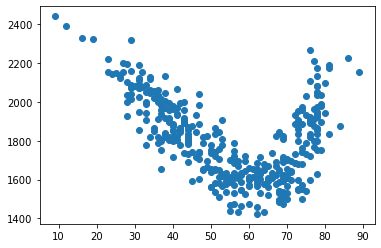

In [3]:
# your code here
x=nyc[['temperature']]
y=nyc[['load']]
plt.scatter(x,y)

**Part 2:** Build a pipeline with the following steps: scaler + polynomial features (degree=2) + linear regression model

In [4]:
# your code here
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn import set_config
set_config(display='diagram')
pipe=Pipeline(steps=[
    ('scaler',MinMaxScaler()),
    ('poly_features',PolynomialFeatures(degree=2)),
    ('reg',Ridge())
    
])

**Part 3:** Fit the pipeline to the data.

In [5]:
# your code here
pipe.fit(x,y)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('poly_features', PolynomialFeatures()), ('reg', Ridge())])

Plot the data and the regression model.

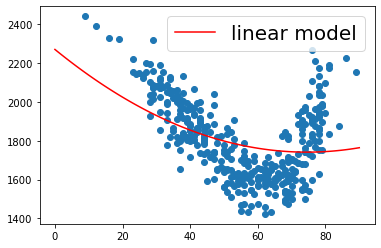

In [6]:
# your code here
plt.scatter(x,y)
m_plot=100
x_plot=np.linspace(0,90,m_plot).reshape(m_plot,1)
y_plot=pipe.predict(x_plot)
plt.plot(x_plot,y_plot,c='red',label='linear model')
plt.legend(fontsize=20)


**Part 4:** Set the polynomial features degree to 100.

In [7]:
# your code here
pipe=Pipeline(steps=[
    ('scaler',MinMaxScaler()),
    ('poly_features',PolynomialFeatures(degree=100)),
    ('reg',Ridge())
    
])

Fit the pipeline to the model.

In [8]:
# your code here
pipe.fit(x,y)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('poly_features', PolynomialFeatures(degree=100)),
                ('reg', Ridge())])

Plot the data and the regression model

<Figure size 1080x432 with 0 Axes>

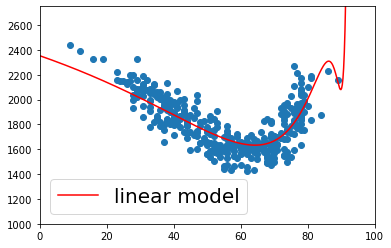

<Figure size 1080x432 with 0 Axes>

In [9]:
# your code here
plt.scatter(x,y)
m_plot=500
x_plot=np.linspace(0,100,m_plot).reshape(m_plot,1)
y_plot=pipe.predict(x_plot)
plt.plot(x_plot,y_plot,c='red',label='linear model')
plt.xlim([0,100])
plt.ylim([1000,2750])
plt.legend(fontsize=20)
plt.figure(figsize=(15,6))



**Part 5:** Split the data into training and testing sets

In [10]:
# your code here
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y)

**Part 6:** Plot the regression model root mean squared error on the training and testing sets as a function of the polynomial features degree.

In [11]:
# your code here
from sklearn.metrics import mean_squared_error
rmse_train = []
rmse_test = []
max_deg = 30
for degree in range(1,max_deg):
    
    # set polynomial features degree to degree
    pipe['poly_features'].degree = degree
    # fit the pipeline
    pipe.fit(x_train,y_train)
    #RMSE on train set
    y_train_pred = pipe.predict(x_train)
    rmse_train.append(mean_squared_error(y_train,y_train_pred))
    #RMSE on test set_
    y_test_pred = pipe.predict(x_test)
    rmse_test.append(mean_squared_error(y_test,y_test_pred))

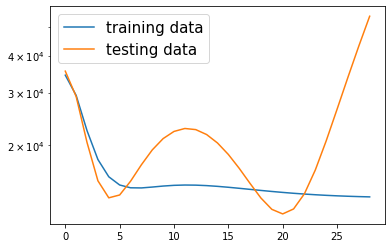

In [12]:
plt.semilogy(rmse_train,label='training data')
plt.semilogy(rmse_test,label='testing data')
plt.legend(fontsize=15)